In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [286]:
#import data

os.chdir(r'C:\Users\nmur1\Google Drive\Springboard\Data Story Telling')
df = pd.read_csv('Netflix Releases.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Inspect with shape, head, info describe, etc

In [287]:

df.shape

(6234, 12)

In [288]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [290]:
df.describe()

,show_id,release_year
count,6234.00000,6234.00000
mean,76703679.31986,2013.35932
std,10942964.64988,8.81162
min,247747.00000,1925.00000
25%,80035801.75000,2013.00000
50%,80163367.00000,2016.00000
75%,80244888.75000,2018.00000
max,81235729.00000,2020.00000


### Clean and Convert

In [291]:
# convert duration to number

import re
def conv(string):
    regex = re.compile(r'\d*')
    value = regex.search(string)
    try:
        conversion = value.group()
    
    except:
        conversion = 0
        
    return conversion

df['duration'] = df.duration.apply(conv).astype('int64')

In [292]:
# convert date field to date time. Extract year into it's own column
#filter out 2020 - not enough data (year is not over yet)

import datetime
df.date_added = pd.to_datetime(df.date_added)
df['year_added'] = df.date_added.dt.year
df = df[df.year_added < 2020]

Text(0, 0.5, 'Percentage of Releases as a Whole')

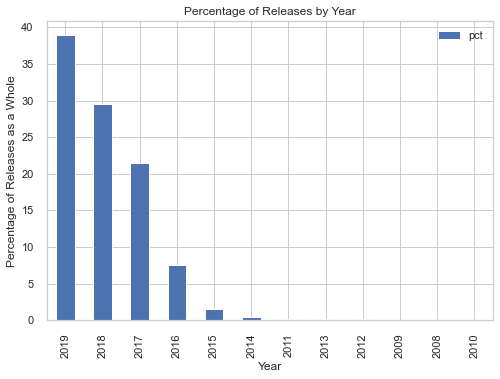

In [293]:
# analyze relases by year

yearly = pd.DataFrame(df.year_added.value_counts())
yearly = yearly.reset_index()
yearly.columns = ['Year', 'Releases']
yearly.Year = yearly.Year.astype('int64')

yearly['pct'] = yearly.Releases.apply(lambda x: x / yearly.Releases.sum() * 100)
yearly[['Year', 'pct']].plot.bar(x = 'Year', y = 'pct')
plt.title('Percentage of Releases by Year')
plt.ylabel('Percentage of Releases as a Whole')

In [294]:
yearly

,Year,Releases,pct
0,2019,2349,38.89717
1,2018,1782,29.50820
2,2017,1300,21.52674
3,2016,456,7.55092
4,2015,90,1.49031
5,2014,25,0.41398
6,2011,13,0.21527
7,2013,12,0.19871
8,2012,7,0.11591
9,2009,2,0.03312


In [295]:
#review "listed in" categories (aks Genre)
df.listed_in.value_counts()

Documentaries                                                  298
Stand-Up Comedy                                                270
Dramas, International Movies                                   247
Dramas, Independent Movies, International Movies               183
Comedies, Dramas, International Movies                         170
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy         1
Independent Movies                                               1
Classic Movies, Comedies, Sports Movies                          1
Anime Series, Romantic TV Shows                                  1
Name: listed_in, Length: 451, dtype: int64

In [296]:
# review ratings colunm
df.rating.value_counts()

TV-MA       1991
TV-14       1674
TV-PG        695
R            461
PG-13        244
NR           217
PG           165
TV-Y7        161
TV-G         148
TV-Y         139
TV-Y7-FV      94
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

In [297]:
#convert ratings to either "Adult, Teen, or All"
df.rating = df['rating'].map({'TV-MA': 'ADULT',
                            'TV-14': 'TEEN',
                           'TV-PG': 'ALL',
                           'R': 'ADULT',
                           'PG-13': 'TEEN',
                           'NR': 'ALL',
                           'PG': 'ALL',
                           'TV-Y7': 'ALL',
                           'TV-G': 'ALL',
                           'TV-Y': 'ALL',
                           'TV-Y7-FV': 'ALL',
                           'G': 'ALL',
                           'UR': 'ALL',
                           'NC-17': 'ADULT'}).values

In [298]:
df.rating.value_counts()

ADULT    2454
TEEN     1918
ALL      1658
Name: rating, dtype: int64

In [299]:
df.type.value_counts()

Movie      4117
TV Show    1922
Name: type, dtype: int64

## Make Graphs for Power Point Presentation

Text(0.5, 1.0, 'Total Releases by Movie and TV Show Category')

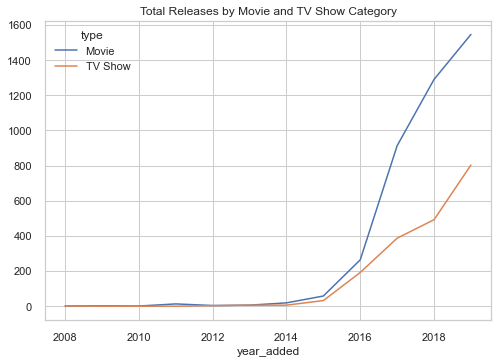

In [300]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

t = df.groupby(['year_added', 'type'])['show_id'].count().unstack().replace(np.nan, 0)
t.plot()
plt.title('Total Releases by Movie and TV Show Category')

Text(0.5, 1.0, 'Percent of TV Shows Released')

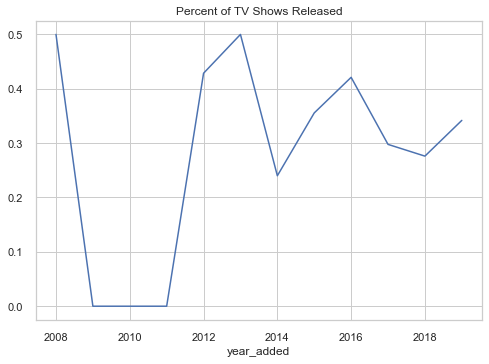

In [301]:
t['TOTAL'] = t.Movie + t['TV Show']
t['per TV'] = t['TV Show']/t.TOTAL
t['per TV'].plot()
plt.title('Percent of TV Shows Released')

Text(0.5, 1.0, 'Releases by Maturity Rating')

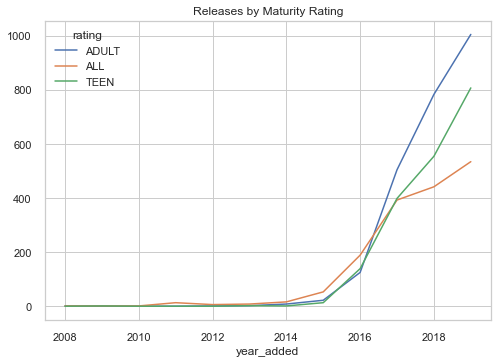

In [302]:
rating = df.groupby(['year_added', 'rating'])['rating'].count().unstack().replace(np.nan, 0)
rating.plot()
plt.title('Releases by Maturity Rating')

Text(0.5, 1.0, 'Percent of Adult Rated Content over the Years')

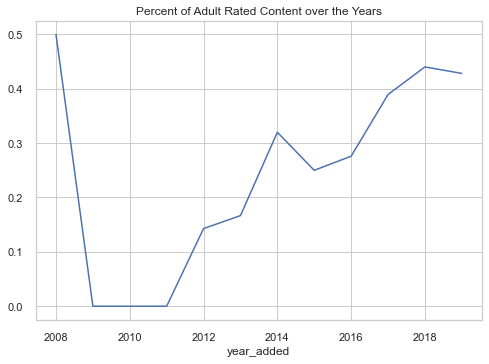

In [303]:
rating['TOTAL'] = rating.ADULT + rating.ALL + rating.TEEN
rating['per_Adult'] = rating.ADULT / rating.TOTAL
rating['per_Adult'].plot()
plt.title('Percent of Adult Rated Content over the Years')

In [304]:
import plotly.express as px
import plotly.graph_objects as go

col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
fig

In [284]:
d2 = df[(df.type == 'Movie') ]

from collections import Counter
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="Movies", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [213]:
lst = []

for year in range(2008, 2021):
    dfy = df[df.year_added == year]
    col = "listed_in"
    categories = ", ".join(dfy['listed_in']).split(", ")
    counter_list = Counter(categories).most_common(50)
    x = pd.DataFrame(counter_list)
    x['Year'] = year
    lst.append(x)
    

In [214]:
genre = pd.concat(lst)
genre.columns = ['Genre', 'count', 'Year']
g2 = genre.groupby(['Year','Genre'])['count'].sum().reset_index()

In [215]:
g2.to_csv('Genres.csv')

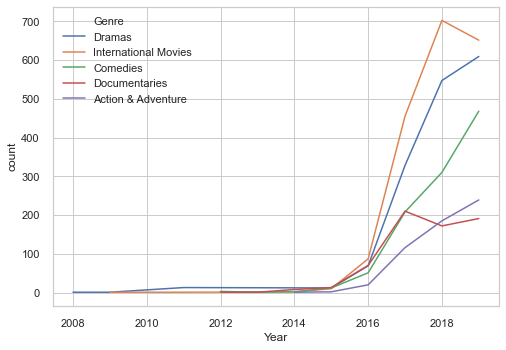

In [216]:
top5 = ['International Movies', 'Dramas', 'Comedies', 'Documentaries', 'Action & Adventure']

dftop5 = g2[g2.Genre.isin(top5)]

sns.lineplot(x = 'Year', y = 'count', hue = 'Genre', data = dftop5)

Text(0.5, 1.0, 'International Movie Growth')

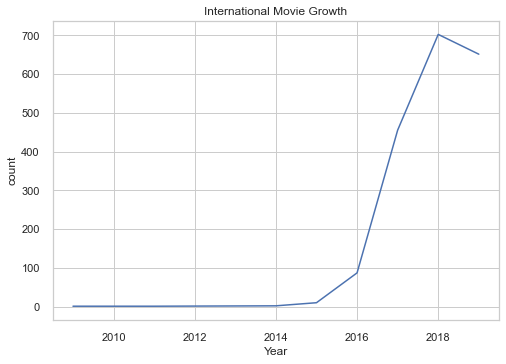

In [217]:
sns.lineplot(x = 'Year', y = 'count', data = dftop5[dftop5.Genre == 'International Movies'])
plt.title('International Movie Growth')

In [218]:


pvt = pd.pivot_table(dftop5, values='count', columns=['Genre'], index = 'Year',aggfunc='sum', fill_value=0).reset_index()

In [222]:
Adult = rating['per_Adult'].reset_index()
Adult.columns = ['Year', 'per_Adult']
Adult.Year = Adult.Year.astype('int64')
pvt.merge(Adult, on = 'Year')

,Year,Action & Adventure,Comedies,Documentaries,Dramas,International Movies,per_Adult
0,2008,0,0,0,1,0,0.50000
1,2009,0,0,0,1,1,0.00000
2,2011,0,0,0,13,1,0.00000
3,2012,0,3,1,0,0,0.14286
4,2013,0,1,1,0,0,0.16667
5,2014,1,2,8,0,2,0.32000
6,2015,2,12,13,12,10,0.25000
7,2016,20,51,70,69,87,0.27594
8,2017,116,208,210,328,455,0.38936
9,2018,185,310,172,547,702,0.44020


In [223]:
pvt['Total'] = pvt.iloc[:,1] +pvt.iloc[:,2]+pvt.iloc[:,3]+pvt.iloc[:,4]+pvt.iloc[:,5]
pvt.iloc[:,1] = pvt.iloc[:,1]/pvt.Total

In [224]:
pvt.iloc[:,2] = pvt.iloc[:,2]/pvt.Total
pvt.iloc[:,3] = pvt.iloc[:,3]/pvt.Total
pvt.iloc[:,4] = pvt.iloc[:,4]/pvt.Total
pvt.iloc[:,5] = pvt.iloc[:,5]/pvt.Total

Text(0.5, 1.0, 'Relase by Genre and Adult Content Percentage')

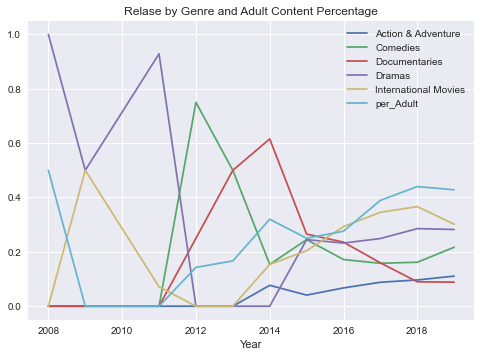

In [225]:
pctGenre = pvt.drop(columns = ['Total'])
pctGenre = pctGenre.merge(Adult, on = 'Year')
plt.figsize = (10,10)
plt.style.use('seaborn')
pctGenre.set_index('Year').plot()
plt.title('Relase by Genre and Adult Content Percentage')

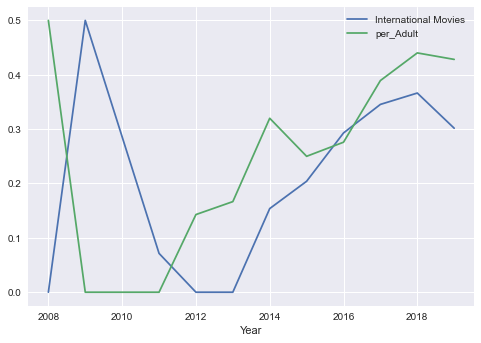

In [226]:
g = pctGenre.set_index('Year')
g[['International Movies', 'per_Adult']].plot()

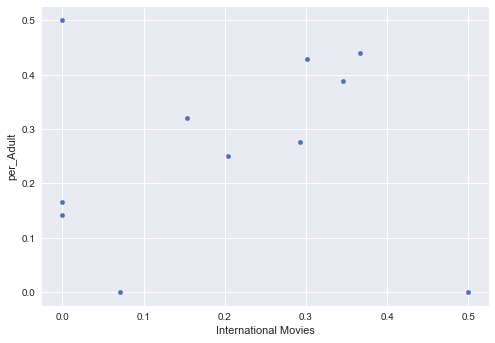

In [229]:
g[['International Movies', 'per_Adult']].plot.scatter(x = 'International Movies', y = 'per_Adult')

Text(0.5, 1.0, 'Percent International vs Percent Adult Content')

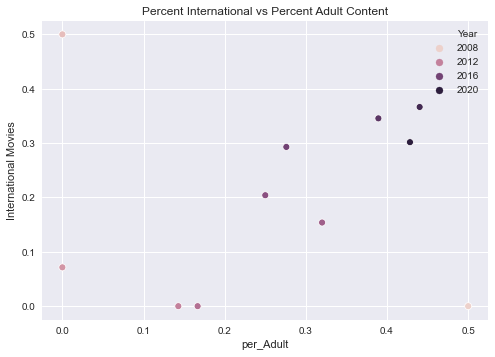

In [232]:

sns.scatterplot(x = 'per_Adult', y = 'International Movies', hue = 'Year', data = pctGenre)
plt.title('Percent International vs Percent Adult Content')

In [ ]:
pctGenre